# distance_between

Calcula a distancia entre pontos dentro de um depósito.

## Libraries

* Importa as bibliotecas utilizadas.
* Define o encoding para utf-8.
* Configura o matplotlib para plotar os gráficos no jupyter notebook.

In [1]:
import math
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
from matplotlib.colors import ListedColormap

%matplotlib inline

## Function - dist_euclid

Calcula a distância entre dois pontos:
* input: vec1 e vec2 - numpy arrays com as coordenadas;
* output: distância entre vec1 e vec2.

In [2]:
def dist_euclid(vec1, vec2):
    return round((((vec2 - vec1) ** 2).sum() ** 0.5), 2)

## Function - azimute

Calcula o azimute entre dois pontos:
* input: vec1 e vec2 - numpy arrays com as coordenadas;
* output: distância entre vec1 e vec2.

Utiliza a função *pseudo\_azimute* e depois corrige o azimute conforme a tabela abaixo (modificado de GROSHONG, 2006, p. 43):

|     $\theta$    | $\Delta x$  | $\Delta y$  |
|:----------------|:-----------:|:-----------:|
|        0°       |      0      |      +      |
| $\theta$'       |      +      |      +      |  
|       90°       |      +      |      0      |
| $\theta$' + 180 |      +      |      -      |
|      180°       |      0      |      -      |
| $\theta$' + 180 |      -      |      -      |
|      270°       |      -      |      0      |
| $\theta$' + 360 |      -      |      +      |

### Referências

GROSHONG, R. H. 3-D Structural Geology: A Practical Guide to Quantitative Surface
and Subsurface Map Interpretation. 2. ed. Berlin, Heidelberg, New York: Springer-Verlag, 2006. 602 p. 

In [3]:
def azimute(vec1, vec2):
    if (vec1[2] > vec2[2]):
        dlt_x = vec2[0] - vec1[0]
        dlt_y = vec2[1] - vec1[1]
    else:
        dlt_x = vec1[0] - vec2[0]
        dlt_y = vec1[1] - vec2[1]
        
    if (dlt_x == 0):
        if (dlt_y == 0):
            az = 0
        elif (dlt_y > 0):
            az = 0
        else:
            az = 180
    elif (dlt_x > 0):
        if (dlt_y == 0):
            az = 90
        elif (dlt_y > 0):
            az = pseudo_azimute(dlt_x,dlt_y)
        else:
            az = pseudo_azimute(dlt_x,dlt_y) + 180
    else:
        if (dlt_y == 0):
            az = 270
        elif (dlt_y > 0):
            az = pseudo_azimute(dlt_x,dlt_y) + 360
        else:
            az = pseudo_azimute(dlt_x,dlt_y) + 180
    return round(az,1)

## Function - pseudo_azimute

Calcula o _pseudo-azimute_:
* input: d_x e d_y - $\Delta x$ e $\Delta y$ entre dois pontos;
* output: _pseudo-azimute_ que precisa ser corrigido para o azimute verdadeiro.

Para o cálculo é utilizada a seguinte fórmula (GROSHONG, 2006, p. 42):

$$\theta'=arctan \left( \frac{\Delta x}{\Delta y} \right) $$

### Referências

GROSHONG, R. H. 3-D Structural Geology: A Practical Guide to Quantitative Surface
and Subsurface Map Interpretation. 2. ed. Berlin, Heidelberg, New York: Springer-Verlag, 2006. 602 p. 

In [4]:
def pseudo_azimute (d_x,d_y):
    return math.degrees(math.atan(d_x/d_y))

## Function - mergulho

Calcula o mergulho:
* input: vec1 e vec2 - numpy arrays com as coordenadas;
* output: ângulo do mergulho.

Para o cálculo é utilizada a seguinte fórmula (GROSHONG, 2006, p. 42):

$$\delta=arcsin \left( \frac{(z_{2}-z_{1})}{L} \right) $$

### Referências

GROSHONG, R. H. 3-D Structural Geology: A Practical Guide to Quantitative Surface
and Subsurface Map Interpretation. 2. ed. Berlin, Heidelberg, New York: Springer-Verlag, 2006. 602 p. 

In [5]:
def mergulho(vec1, vec2):
    if (vec1[2] < vec2[2]):
        dlt_z = vec2[2] - vec1[2]
    else:
        dlt_z = vec1[2] - vec2[2]
    if (dlt_z == 0):
        return 0
    a = round(dlt_z,2)
    b = round(dist_euclid(vec1, vec2),2)
    return round(math.degrees(math.asin(a/b)),1)

## Function - qual_num

Informa o código referente a posição no gráfico:
* input: azi e merg - valor do azimute e mergulho;
* output: código referente a posição no gráfico.

Os códigos retornado correspondem as seguintes subdivisões:

![Figura](img/Cod_graf.png)

In [6]:
def qual_num(azi, merg):
    if ((azi >= 0 and azi <= 360) and (merg >= 0 and merg <= 90)):
        if (azi >= 22.5 and azi < 67.5):
            if (merg >= 0 and merg < 22.5):
                qlnum = 4
            elif (merg >= 22.5 and merg < 45):
                qlnum = 5
            elif (merg >= 45 and merg < 67.5):
                qlnum = 6
            else:
                qlnum = 7
        elif (azi >= 67.5 and azi < 112.5):
            if (merg >= 0 and merg < 22.5):
                qlnum = 8
            elif (merg >= 22.5 and merg < 45):
                qlnum = 9
            elif (merg >= 45 and merg < 67.5):
                qlnum = 10
            else:
                qlnum = 11
        elif (azi >= 112.5 and azi < 157.5):
            if (merg >= 0 and merg < 22.5):
                qlnum = 12
            elif (merg >= 22.5 and merg < 45):
                qlnum = 13
            elif (merg >= 45 and merg < 67.5):
                qlnum = 14
            else:
                qlnum = 15
        elif (azi >= 157.5 and azi < 202.5):
            if (merg >= 0 and merg < 22.5):
                qlnum = 16
            elif (merg >= 22.5 and merg < 45):
                qlnum = 17
            elif (merg >= 45 and merg < 67.5):
                qlnum = 18
            else:
                qlnum = 19
        elif (azi >= 202.5 and azi < 247.5):
            if (merg >= 0 and merg < 22.5):
                qlnum = 20
            elif (merg >= 22.5 and merg < 45):
                qlnum = 21
            elif (merg >= 45 and merg < 67.5):
                qlnum = 22
            else:
                qlnum = 23
        elif (azi >= 247.5 and azi < 292.5):
            if (merg >= 0 and merg < 22.5):
                qlnum = 24
            elif (merg >= 22.5 and merg < 45):
                qlnum = 25
            elif (merg >= 45 and merg < 67.5):
                qlnum = 26
            else:
                qlnum = 27
        elif (azi >= 292.5 and azi <337.5):
            if (merg >= 0 and merg < 22.5):
                qlnum = 28
            elif (merg >= 22.5 and merg < 45):
                qlnum = 29
            elif (merg >= 45 and merg < 67.5):
                qlnum = 30
            else:
                qlnum = 31
        else:
            if (merg >= 0 and merg < 22.5):
                qlnum = 0
            elif (merg >= 22.5 and merg < 45):
                qlnum = 1
            elif (merg >= 45 and merg < 67.5):
                qlnum = 2
            else:
                qlnum = 3
    else:
        qlnum = 32
    return qlnum

## Importar o banco de dados

* Importar o banco de dados separado por vírgula e sem cabeçalho;
* Preenche a lista _originais_ com as coordenadas dos pontos do banco de dados.

In [7]:
originais = []
calc_tot = []

for i in range(0,33):
    calc_tot.append([])

with open('Fe.txt', 'r') as csvfile:
    leitura = csv.reader(csvfile, delimiter=',')
    for i in leitura:
        aux = []
        aux.append(float(i[0]))
        aux.append(float(i[1]))
        aux.append(float(i[2]))
        originais.append(aux)

## Cálculos

* Calcula a distância, azimute e mergulho entre os pares formados por todos os pontos do depósito;
* Atribui o código referente a posição do par em relação ao gráfico final.

In [8]:
for i in originais:
    temp_calc = [0] * 33
    for j in originais:
        aux_i = np.array(i)
        aux_j = np.array(j)
        dt = dist_euclid(aux_i,aux_j)
        az = azimute(aux_i,aux_j)
        mg = mergulho(aux_i,aux_j)
        ql_num = qual_num(az,mg)
        if (dt > 0):
            if (temp_calc[ql_num] == 0):
                temp_calc[ql_num] = dt
            else:
                if temp_calc[ql_num] > dt:
                    temp_calc[ql_num] = dt
    for k in range(0,len(temp_calc)):
        if (temp_calc[k] > 0):
            calc_tot[k].append(temp_calc[k])

## Dados gráfico

* Cria a lista _resultados_ com as coordenadas de cada subdivisão do gráfico;
* Adiciona as informações sobre média, mediana e quantidade de pares calculados.

In [9]:
resultados = [[10, 0, 0], [33, 0, 0], [52, 0, 0], [70, 0, 90],
[10, 45, -45], [33, 45, -45], [52, 45, -45], [70, 45, 45],
[10, 90, -90], [33, 90, -90], [52, 90, -90], [70, 90, 0],
[10, 135, 45], [33, 135, 45], [52, 135, 45], [70, 135, -45],
[10, 180, 0], [33, 180, 0], [52, 180, 0], [70, 180, 90],
[10, 225, -45], [33, 225, -45], [52, 225, -45], [70, 225, 45],
[10, 270, 90], [33, 270, 90], [52, 270, 90], [70, 270, 0],
[10, 315, 45], [33, 315, 45], [52, 315, 45], [70, 315, -45], 
[10, 380 , 10]]	

for i in range(0,len(calc_tot)):
    tam = len(calc_tot[i])
    if tam > 0:
        resultados[i].append(tam)
        resultados[i].append(round(np.mean(calc_tot[i]),2))
        resultados[i].append(round(np.median(calc_tot[i]),2))
    else:
        resultados[i].append(0)
        resultados[i].append(0)
        resultados[i].append(0)

## Gráfico das distâncias

Gera o gráfico polar, com todas as distância entre as amostras.
* A média está entre colchetes $[ \ ]$;
* A mediana está entre chaves $\{ \ \}$;
* A quantidade de pares calculados está entre parênteses $( \ )$;



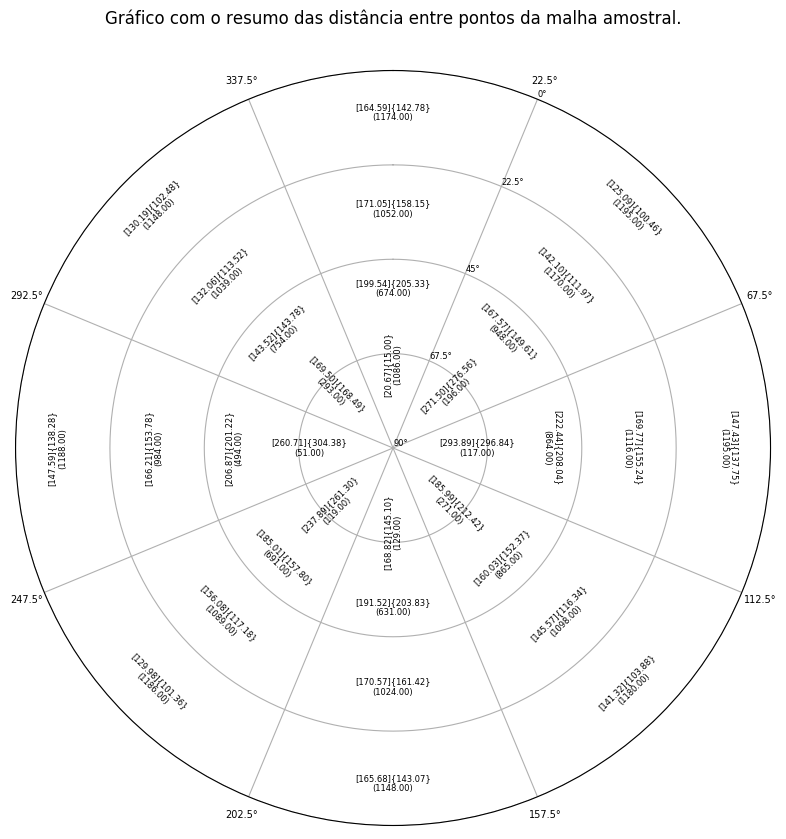

In [10]:
fig, ax= plt.subplots(1, 1, figsize=(10,10), dpi=100, subplot_kw=dict(polar=True))
plt.title(u"Gráfico com o resumo das distância entre pontos da malha amostral.")
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_yticks(np.linspace(0,  90, 5))
yLabel = [u'90°',u'67.5°',u'45°', u'22.5°', u'0°']
ax.set_yticklabels(yLabel,fontsize=6)
ax.set_xticks(np.pi/180. * np.linspace(22.5,  382.5, 8, endpoint=False))
xLabel = [u'22.5°', u'67.5°', u'112.5°', u'157.5°', u'202.5°', u'247.5°', u'292.5°', u'337.5°']
ax.set_xticklabels(xLabel, fontsize=7)

for (E, Az, Rot, tm, mea, med) in resultados:
    if (Az < 360):
        ax.annotate("[%.2f]{%.2f}\n(%.2f)" % (mea, med, tm),
                    xy=(np.radians(Az), 90-E),
                    horizontalalignment='center',
                    verticalalignment='center',fontsize=6,rotation=Rot)
plt.show()